<a href="https://colab.research.google.com/github/Gus-oss/DeepLearning/blob/main/Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks

## Introducción

Aunque las neuronas son realmente interesantes, no podemos usar solo una neurona para realizar tareas complejas. Esta es la razón por la que nuestro cerebro tiene miles de millones de neuronas, apiladas en capas, formando una red. De manera similar, las neuronas artificiales están organizadas en capas. Cada capa estará conectada de tal manera que la información se transmita de una capa a otra.

Una red neuronal artificial típica consta de las siguientes capas:
- Capa de entrada
- Capa oculta
- Capa de salida

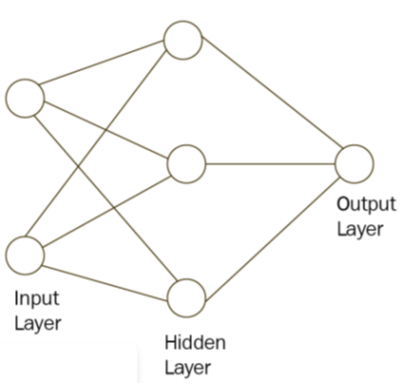

Cada capa tiene una colección de neuronas, y las neuronas en una capa interactúan con todas las neuronas en las otras capas. Sin embargo, las neuronas en la misma capa no interactúan entre sí. Esto se debe simplemente a que las neuronas de las capas adyacentes tienen conexiones o enlaces entre ellas; sin embargo, las neuronas en la misma capa no tienen ninguna conexión. Usamos el término nodos o unidades para representar las neuronas en la red neuronal artificial.

- **Capa de entrada (Input Layer)**:La capa de entrada es donde alimentamos la entrada a la red. El número de neuronas en la capa de entrada es el número de entradas que proporcionamos a la red. Cada entrada tendrá cierta influencia en la predicción de la salida. Sin embargo, no se realiza ningún cálculo en la capa de entrada; solo se utiliza para transmitir información del mundo exterior a la red.
- **Capa oculta (Hidden Layer)**: Cualquier capa entre la capa de entrada y la capa de salida se llama capa oculta. Procesa la información recibida de la capa de entrada. La capa oculta es responsable de derivar relaciones complejas entre la entrada y la salida. Es decir, la capa oculta identifica el patrón en el conjunto de datos. Es principalmente responsable de aprender la representación de los datos y de extraer las características.
- **Capa de salida (Output Layer)**:Después de procesar la entrada, la capa oculta envía su resultado a la capa de salida. Como su nombre indica, la capa de salida emite el resultado. El número de neuronas en la capa de salida se basa en el tipo de problema que queremos que nuestra red resuelva. Si se trata de una clasificación binaria, entonces el número de neuronas en la capa de salida es una, que nos indica a qué clase pertenece la entrada. Si es una clasificación multiclase, por ejemplo, con cinco clases, y queremos obtener la probabilidad de cada clase como salida, entonces el número de neuronas en la capa de salida es cinco, cada una emitiendo la probabilidad. Si se trata de un problema de regresión, entonces tenemos una neurona en la capa de salida.

El número de capas en una red es igual al número de capas ocultas más el número de capas de salida. No se toma en cuenta la capa de entrada al calcular el número de capas en una red. Considera una red neuronal de dos capas con una capa de entrada, una capa oculta y una capa de salida, como se muestra en el siguiente diagrama:

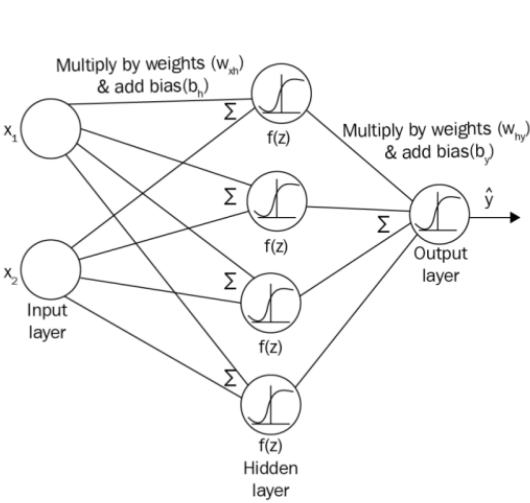

## Propagación hacia adelante de una red neuronal con capas

Consideremos que tenemos dos entradas y tenemos que predecir la salida. Dado que tenemos dos entradas, el número de neuronas en la capa de entrada será dos. Establecemos el número de neuronas en la capa oculta en cuatro, y el número de neuronas en la capa de salida en una. Ahora, las entradas se multiplicarán por pesos, luego se añadirá un sesgo y se propagará el valor resultante a la capa oculta, donde se aplicará la función de activación.

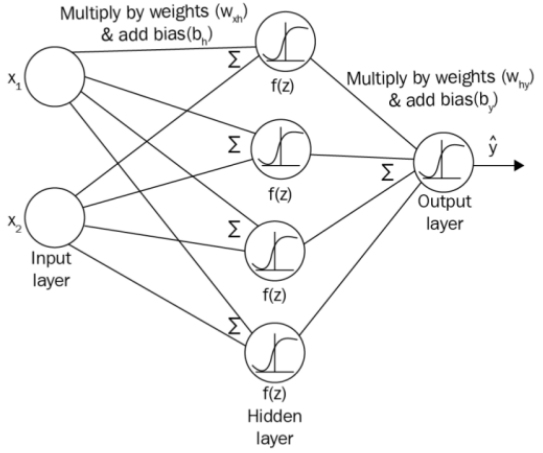

Antes de eso, necesitamos inicializar la matriz de pesos. En el mundo real, no sabemos qué entrada es más importante que otra, por lo que podemos asignarles un peso y calcular la salida. Por lo tanto, inicializaremos los pesos y el valor del sesgo de manera aleatoria. El peso y el valor del sesgo entre la entrada y la capa oculta están representados por $W_{xh}$ y $b_{h}$, respectivamente. ¿Qué hay de las dimensiones de la matriz de pesos? Las dimensiones de la matriz de pesos deben ser el número de neuronas en la capa actual x el número de neuronas en la siguiente capa. ¿Por qué es eso? Porque es una regla básica de multiplicación de matrices. Para multiplicar dos matrices, AB, el número de columnas en la matriz A debe ser igual al número de filas en la matriz B. Así que, las dimensiones de la matriz de pesos deberían ser el número de neuronas en la capa de entrada $X_{1 \times 2 }$ el número de neuronas en la capa oculta, es decir, $2 \times 4$

Para la primer $z_{1} = X_{1 \times 2}W_{2 \times 4} + b_{1 \times 4}$

En $X_{1 \times 2}$ es la matriz que tiene como primera entrada $x_{1}$ y como segunda entrada $x_{2}$. Para $W_{2 \times 4}$ es la matriz de los pesos, en la primera fila van a estar los pesos para $x_{1}$ de las 4 neuronas de la capa oculta y en la fila 2 van a estar los pesos para $x_{2}$ de las 4 neuronas de la capa oculta, finalmente para $b_{1 \times 4}$ van a estar los bias de las 4 neuronas de la capa oculta.

El resultado es que $z_{1}$ es una matriz con dimension $1 \times 4$.

Posteriormente aplicamos la funcion de activación sigmoide (en este caso es igual para todas las neuronas.) $a_{1} = σ(z_{1})$. La $a_{1}$ es tambien una matriz de $1 \times 4$

Para la neurona de salida, esta necesita 4 pesos, puesto que $a_{1}$ es de dimension $1 \times 4$. Ahora, $z_{2}$ (que esta en la capa de salida) va a ser igual a ${a_{1}}_{1\times4}W_{4 \times 1} + b_{1\times1}$. La matriz $W'_{4 \times 1}$ tiene que guardar los pesos de la capa de salida (le puse la ' para no confundir estamatriz con la matriz de pesos que esta en la capa oculta). Y el bias es de $1\times 1 $ es decir un elemento.

Al final, obtenemos $z_{1}$ y despues, como en este ejemplo la neurona de la capa de salida tiene una función de activación sigmoide, entonces aplicamos la funcion de activacion a la neurona obteniendo $\hat{y} = σ(z_{2})$, el cual seria nuestro output (es un valor de  $1\times 1$)

## Propagación hacia atras de una red neuronal con capas

Pongamos la función de costos la de MSE

$$L = \frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}$$

Para hacer la propagación hacia atras, desde la capa de salida hacia la capa de entrada. Se actualizan primero los pesos de la capa de salida y despues los pesos de la capa oculta.

Obtenemos el gradiente de los pesos
$$\frac{\partial L}{\partial W_{4 \times 1}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z_{2}}\frac{\partial z_{2}}{\partial W_{4\times 1}}$$

Como estamos situados en la capa de salida, la funcion de costos simplemente sera $\frac{1}{2}(y-\hat{y})^{2}$. Si desglosamos cada parte de la formula de $\frac{\partial L}{\partial W_{4 \times 1 }}$, obtenemos:

- $\frac{\partial L}{\partial \hat{y}} = (y-\hat{y})$
- $\frac{\partial \hat{y}}{\partial z_{2}} = σ'(z_{2})$
- $\frac{\partial z_{2}}{\partial W_{4\times 1}} = a_{1}$

Remplazando
$$\frac{\partial L}{\partial W_{4 \times 1}} = (y-\hat{y})σ'(z_{2})a_{1} $$
Esto es para la capa de salida, falta la capa de entrada. Para la capa de entrda si necesitaremos utliziar ahora la formula con la sumatoria de la funcion de costos (puesto que ahora hay mas de una neurona)

Obteniendo el gradiente



$$\frac{\partial L}{\partial W_{1\times 4}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z_{2}}\frac{\partial z_{2}}{\partial a_{1}}\frac{\partial a_{1}}{\partial z_{1}}\frac{\partial z_{1}}{\partial W_{1\times 4}}$$

Calculamos las derivadas:
- $\frac{\partial L}{\partial \hat{y}} = (y-\hat{y}) $
- $\frac{\partial \hat{y}}{\partial z_{2}} = σ'(z_{2})$
- $\frac{\partial z_{2}}{\partial a_{1}} = W_{4 \times 1}$
- $\frac{\partial a_{1}}{\partial z_{1}} = \sigma ' (z_{1})$
- $\frac{\partial z_{1}}{\partial W_{1 \times 4}} = x$

Todo junto, obtendriamos

$$\frac{\partial L }{\partial W_{1 \times 4}} = (y-\hat{y})σ'(z_{2})W_{4 \times 1}\sigma ' (z_{1})x $$

Al final, se actualizaran los pesos de la siguiente manera.
Para la capa de salida:
$${W_{4\times 1}}_{Nuevo} = {W_{4 \times 1}}_{Anterior} - α ⋅ \frac{\partial L}{\partial W_{4 \times 1}}$$

Para la capa oculta:
$${W_{1 \times 4}}_{Nuevo} = {W_{1 \times 4}}_{Anterior} - α ⋅ \frac{\partial L}{\partial W_{1 \times 4}}$$

Obs: La derivada de la sigmoide es $\frac{e^{-z}}{(1 + e^{-z})^{2}}$

# Terminos clave

- Época (Epoch): La época especifica el número de veces que la red neuronal ve todos nuestros datos de entrenamiento. Por lo tanto, podemos decir que una época equivale a un pase hacia adelante y un pase hacia atrás para todas las muestras de entrenamiento.
- Tamaño del lote (Batch size): El tamaño del lote especifica el número de muestras de entrenamiento que usamos en un pase hacia adelante y un pase hacia atrás.
- Número de iteraciones: El número de iteraciones implica el número de pases donde un pase = un pase hacia adelante + un pase hacia atrás.